# 3 - RL Enviroment 
In this part we are going to build the most essential Enviroment to create a RL  Pipeline.

The first framework that we are going to use is the  **RAY**

We are going to  pass either a string name or a Python class to specify an environment.  In particular we are going to choose the simplest local enviroment.

Custom env classes passed directly to the algorithm must take a single env_config parameter in their constructor:



### Example 1 - Gym + Ray

In [1]:
import gym, ray
from gym import spaces
from ray.rllib.algorithms import ppo

class MyEnv(gym.Env):
    def __init__(self, env_config=None):
       # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)      #<gym.Space>
        self.observation_space = spaces.Discrete(2) #<gym.Space>
    
    def reset(self):
        state = 0
        #return <obs>
        return state
                           
    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
        # return <obs>, <reward: float>, <done: bool>, <info: dict>
        return state, reward, done, info   

Python 3.8.x
ray 1.0
tensorflow 2.3.1
tensorflow-probability 0.11
gym 0.17.3
pygame 2.0.0

In [4]:
tune.run(
    "SAC", # reinforced learning agent
    name = "Training1",
    checkpoint_freq = 100,
    checkpoint_at_end = True,
    local_dir = r'./ray_results/',
    config={
        "env": MyEnv,
        "num_workers": 30,
        "num_cpus_per_worker": 0.5,
        "env_config":{
            "max_steps": 1000,
            "export_frames": False,
            "export_states": False,
            # "reward_mode": "continuous",
            # "env_flipped": True,
            # "env_flipmode": True,
            }
        },
    stop = {
        "timesteps_total": 5_000_000,
        },
    )

C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\tensorflow_probability\python\internal\backend\numpy\dtype.py:82: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  bool = np.bool  # pylint: disable=redefined-builtin


AttributeError: module 'numpy' has no attribute 'bool'

In [3]:
ray.init()
#algo = ppo.PPO(env=MyEnv, config={"env_config": {},  # config to pass to env class
#})

#algo = ppo.PPO(env=MyEnv, config=config) 

algo = ppo.PPO(env=MyEnv,config={"num_workers": 4})

mean_ppo = []

2023-01-17 15:12:35,207	INFO worker.py:1538 -- Started a local Ray instance.
2023-01-17 15:12:38,913	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.MyEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.MyEnv'>').build()` instead. This will raise an error in the future!
2023-01-17 15:12:38,914	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-01-17 15:12:38,982	INFO algorithm.py:501 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(RolloutWorker pid=9788) 2023-01-17 15:12:50,594	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your c

In [4]:
for _ in range(25):
    result = algo.train()
    print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

episode reward mean: 0 -0.5975
episode reward mean: 1 -0.134
episode reward mean: 2 0.22
episode reward mean: 3 0.6285
episode reward mean: 4 0.7415
episode reward mean: 5 0.8035
episode reward mean: 6 0.883
episode reward mean: 7 0.917
episode reward mean: 8 0.9455
episode reward mean: 9 0.97
episode reward mean: 10 0.988
episode reward mean: 11 0.9915
episode reward mean: 12 0.9985
episode reward mean: 13 0.998
episode reward mean: 14 0.9985
episode reward mean: 15 1.0
episode reward mean: 16 1.0
episode reward mean: 17 1.0
episode reward mean: 18 1.0
episode reward mean: 19 0.9995
episode reward mean: 20 1.0
episode reward mean: 21 1.0
episode reward mean: 22 0.9995
episode reward mean: 23 1.0
episode reward mean: 24 1.0


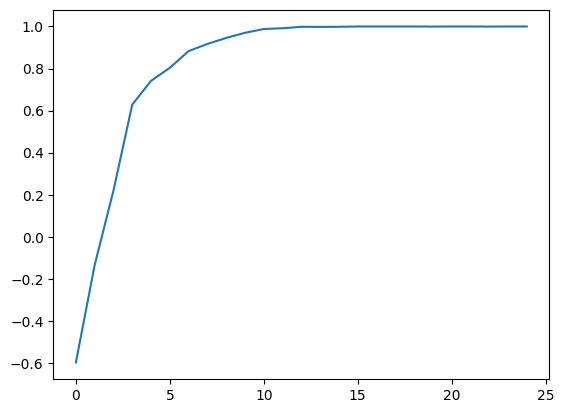

In [5]:
import matplotlib.pyplot as plt

xs = [x for x in range(len(mean_ppo))]

plt.plot(xs, mean_ppo)
plt.show()


### How to use the trained algorithm in RL with PP0

In [6]:
trainer=algo

In [7]:
checkpoint = trainer.save()

In [8]:
print(checkpoint)

C:\Users\RMAGANAV/ray_results\PPO_MyEnv_2023-01-17_15-12-38f9tlo2y0\checkpoint_000025


In [11]:
#TODO Fix the windows path
#evaluation = trainer.evaluate(checkpoint)

## Computing actions

In [30]:
env = MyEnv()

In [31]:
done = False
total_reward = 0

In [42]:
observations = env.reset()

In [47]:
print(observations) # The state which you should determine the action

0


Given any state compute the action which you get the maximum reward in according to the traning 

In [49]:
action = trainer.compute_single_action(observations)

In [50]:
action

2

In [51]:
while not done:
    action = trainer.compute_single_action(observations)
    observations, reward, done, info = env.step(action)
    total_reward += reward
    print("observations, reward, done, info",observations, reward, done, info)


In [52]:
action = trainer.compute_actions({"obs_1": observations, "obs_2": observations})
print(action)
# {'obs_1': 0, 'ob

{'obs_1': 2, 'obs_2': 2}


In the following example we are interested to include pygame

### Example 2 - Gym + Ray + Pygame

In [61]:
import gym
from gym import spaces
import numpy as np
import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]

# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class MyEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(1)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])
        
        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        self.steps = 0

    def reward_value(self,worker,target):
         #Check for collision between two rects
        if worker.colliderect(target):
            print("worker, target",worker, target)
            reward=1
            done=True    
        else:
            reward=-1
            done=False
        return reward
              
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        if action != None:
            print(self.worker_pos)
            
        # We update the state with an image
        self.update_game_state()

        if action != None:
            #print(self.worker_rect,self.target_rect)
            reward= self.reward_value(self.worker_rect,self.target_rect)
 
        # regardless of the action, game is done after step becomes true
        reward_tmp, done = self.game_over(reward)
        info = {}        
        img = self.get_image_array_from_game()
        state=img
        #print('step:', self.steps)
        self.steps += 1
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]

            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'            
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        self.steps = 0
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        if action=='CLICK':
            return worker_pos
       
        return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass
    
    def game_over(self, reward):
        if (reward < 1) or (self.steps >= 100): 
            return -1, True
        else:
            return reward, False

Initial position 100 100
Target position 50 50
action_n 0
CLICK
[25, 25]
worker, target <rect(25, 25, 18, 18)> <rect(41, 41, 18, 18)>
Reward = 1 with action = CLICK
1 False {}


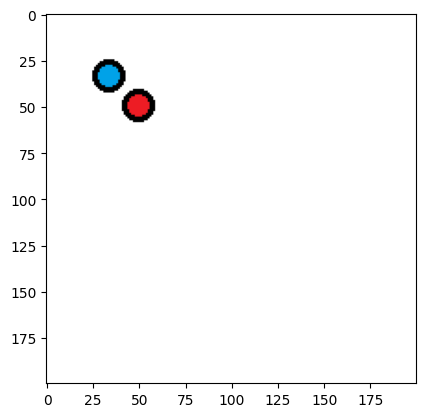

In [62]:
# method 1 - use local test class
env = MyEnv()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action_key={0:'CLICK'}
action=action_key[action_n]
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [69]:
import sys
env = MyEnv()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    if action != None:
        print("Reward = {} with action = {} ".format(reward,action))    
    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
[90, 41]
Reward = -1 with action = CLICK 
[90, 41]
Reward = -1 with action = CLICK 
[97, 101]
worker, target <rect(97, 101, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[97, 101]
worker, target <rect(97, 101, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[97, 97]
worker, target <rect(97, 97, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[97, 97]
worker, target <rect(97, 97, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[88, 98]
worker, target <rect(88, 98, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[88, 98]
worker, target <rect(88, 98, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[101, 94]
worker, target <rect(101, 94, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[101, 94]
worker, target <rect(101, 94, 18, 18)> <rect(91, 91, 18, 18)>
Reward = 1 with action = CLICK 
[101, 94]
worker, target <rect(101, 94, 18, 18)> <rect(91, 91, 18, 

SystemExit: 

In [68]:
import gym, ray
from gym import spaces
from ray.rllib.algorithms import ppo
ray.shutdown()
ray.init()
disable_env_checking=True
#algo = ppo.PPO(env=MyEnv, config={"env_config": {},  # config to pass to env class
#})

#algo = ppo.PPO(env=MyEnv, config=config) 

algo = ppo.PPO(env=MyEnv0,config={"num_workers": 1})

mean_ppo = []

2023-01-18 15:32:24,225	INFO worker.py:1538 -- Started a local Ray instance.
2023-01-18 15:32:28,230	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.MyEnv0'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.MyEnv0'>').build()` instead. This will raise an error in the future!


TypeError: Could not serialize the argument <function Algorithm._get_env_id_and_creator.<locals>.<lambda> at 0x000001CC56A62EE0> for a task or actor ray.rllib.evaluation.rollout_worker.RolloutWorker.__init__. Check https://docs.ray.io/en/master/ray-core/objects/serialization.html#troubleshooting for more information.

# Example 3

In [65]:
import pygame
import numpy as np
import gym
window_width, window_height = 1000, 500
rotation_max, acceleration_max = 0.08, 0.5

class CustomEnv(gym.Env):
    def __init__(self,env_config={}):
        # self.observation_space = gym.spaces.Box()
        # self.action_space = gym.spaces.Box()
        self.x = window_width/2
        self.y = window_height/2
        self.ang = 0.
        self.vel_x = 0.
        self.vel_y = 0.

    def init_render(self):
        import pygame
        pygame.init()
        self.window = pygame.display.set_mode((window_width, window_height))
        self.clock = pygame.time.Clock()

    def reset(self):
        # reset the environment to initial state
        return observation

    def step(self, action=np.zeros((2),dtype=float)):
        # action[0]: acceleration | action[1]: rotation
        
        # ─── APPLY ROTATION ──────────────────────────────────────────────
        self.ang = self.ang + rotation_max * action[1]
        if self.ang > np.pi:
            self.ang = self.ang - 2 * np.pi
        if self.ang < -np.pi:
            self.ang = self.ang + 2 * np.pi
            
        # ─── APPLY ACCELERATION ──────────────────────────────────────────
        acceleration = action[0]
        # backwards acceleration at half thrust
        if acceleration < 0:
            acceleration = acceleration * 0.5
        self.vel_x = self.vel_x + acceleration_max * acceleration * np.cos(self.ang)
        self.vel_y = self.vel_y - acceleration_max * acceleration * np.sin(self.ang)
        
        # move rocket
        self.x = self.x + self.vel_x
        self.y = self.y + self.vel_y
        
        # keep rocket on screen (optional)
        if self.x > window_width:
            self.x = self.x - window_width
        elif self.x < 0:
            self.x = self.x + window_width
        if self.y > window_height:
            self.y = self.y - window_height
        elif self.y < 0:
            self.y = self.y + window_height
            
        observation, reward, done, info = 0., 0., False, {}
        return observation, reward, done, info
    
    def render(self):
        self.window.fill((0,0,0))
        pygame.draw.circle(self.window, (0, 200, 200), (int(self.x), int(self.y)), 6)
        # draw orientation
        p1 = (self.x - 10 * np.cos(self.ang),self.y + 10 * np.sin(self.ang))
        p2 = (self.x + 15 * np.cos(self.ang),self.y - 15 * np.sin(self.ang))
        pygame.draw.line(self.window,(0,100,100),p1,p2,2)
        pygame.display.update()
        
def pressed_to_action(keytouple):
    action_turn = 0.
    action_acc = 0.
    if keytouple[274] == 1:  # back
        action_acc -= 1
    if keytouple[273] == 1:  # forward
        action_acc += 1
    if keytouple[276] == 1:  # left  is -1
        action_turn += 1
    if keytouple[275] == 1:  # right is +1
        action_turn -= 1
    # ─── KEY IDS ─────────
    # arrow forward   : 273
    # arrow backwards : 274
    # arrow left      : 276
    # arrow right     : 275
    return np.array([action_acc, action_turn])

In [66]:
environment = CustomEnv()
environment.init_render()

In [67]:
run = True
while run:
    # set game speed to 30 fps
    environment.clock.tick(30)
    # ─── CONTROLS ───────────────────────────────────────────────────────────────────
    # end while-loop when window is closed
    get_event = pygame.event.get()
    for event in get_event:
        if event.type == pygame.QUIT:
            run = False
    # get pressed keys, generate action
    get_pressed = pygame.key.get_pressed()
    action = pressed_to_action(get_pressed)
    # calculate one step
    environment.step(action)
    # render current state
    environment.render()
pygame.quit()


In [60]:
import gym, ray
from gym import spaces
from ray.rllib.algorithms import ppo
ray.shutdown()
ray.init()
disable_env_checking=True
algo = ppo.PPO(env=CustomEnv, config={"env_config": {},  # config to pass to env class
})

#algo = ppo.PPO(env=MyEnv, config=config) 

#algo = ppo.PPO(env=MyEnv0,config={"num_workers": 1})

mean_ppo = []

2023-01-18 15:01:32,713	INFO worker.py:1538 -- Started a local Ray instance.
2023-01-18 15:01:36,167	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.CustomEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.CustomEnv'>').build()` instead. This will raise an error in the future!
(RolloutWorker pid=16144) 2023-01-18 15:01:43,082	ERROR worker.py:763 -- Exception raised in creation task: The actor died because of an error raised in its creation task, ray::RolloutWorker.__init__() (pid=16144, ip=127.0.0.1, repr=<ray.rllib.evaluation.rollout_worker.RolloutWorker object at 0x00000181F599EDC0>)
(RolloutWorker pid=16144)   File "C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\ray\rllib\utils\pre_checks\env.py", line 140, in check_gym_environments
(RolloutWorker pid=16144)     raise ValueError("Observation space must be a gym.space")
(RolloutWorker pid=16144) ValueError: Observation space must be a gym.spa

2023-01-18 15:01:43,104	ERROR actor_manager.py:486 -- Ray error, taking actor 2 out of service. The actor died because of an error raised in its creation task, ray::RolloutWorker.__init__() (pid=27316, ip=127.0.0.1, repr=<ray.rllib.evaluation.rollout_worker.RolloutWorker object at 0x0000024AC80CED60>)
  File "C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\ray\rllib\utils\pre_checks\env.py", line 140, in check_gym_environments
    raise ValueError("Observation space must be a gym.space")
ValueError: Observation space must be a gym.space

During handling of the above exception, another exception occurred:

ray::RolloutWorker.__init__() (pid=27316, ip=127.0.0.1, repr=<ray.rllib.evaluation.rollout_worker.RolloutWorker object at 0x0000024AC80CED60>)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_rayl

(RolloutWorker pid=27316) pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
(RolloutWorker pid=27316) Hello from the pygame community. https://www.pygame.org/contribute.html
(RolloutWorker pid=16144) pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
(RolloutWorker pid=16144) Hello from the pygame community. https://www.pygame.org/contribute.html


ValueError: Traceback (most recent call last):
  File "C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\ray\rllib\utils\pre_checks\env.py", line 77, in check_env
    check_gym_environments(env)
  File "C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\ray\rllib\utils\pre_checks\env.py", line 140, in check_gym_environments
    raise ValueError("Observation space must be a gym.space")
ValueError: Observation space must be a gym.space

The above error has been found in your environment! We've added a module for checking your custom environments. It may cause your experiment to fail if your environment is not set up correctly. You can disable this behavior by setting `disable_env_checking=True` in your environment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env([env]).

In [ ]:
https://github.com/danuo/rocket-meister

https://towardsdatascience.com/ultimate-guide-for-reinforced-learning-part-1-creating-a-game-956f1f2b0a91

In [ ]:
for _ in range(25):
    result = algo.train()
    print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

In [ ]:
from ray import tune
from rocket_gym import RocketMeister10
tune.run(
    "SAC", # reinforced learning agent
    name = "Training1",
    # to resume training from a checkpoint, set the path accordingly:
    # resume = True, # you can resume from checkpoint
    # restore = r'.\ray_results\Example\SAC_RocketMeister10_ea992_00000_0_2020-11-11_22-07-33\checkpoint_3000\checkpoint-3000',
    checkpoint_freq = 100,
    checkpoint_at_end = True,
    local_dir = r'./ray_results/',
    config={
        "env": RocketMeister10,
        "num_workers": 30,
        "num_cpus_per_worker": 0.5,
        "env_config":{
            "max_steps": 1000,
            "export_frames": False,
            "export_states": False,
            # "reward_mode": "continuous",
            # "env_flipped": True,
            # "env_flipmode": True,
            }
        },
    stop = {
        "timesteps_total": 5_000_000,
        },
    )